In [26]:
import matplotlib.pyplot as plt
import requests
import json
import csv
import time
import numpy as np
import pandas as pd
from scipy.stats import linregress

In [27]:
# Set up dataframe
# source https://www.usarx.com/pharmacy-deserts
states = ["AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN","IA","KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NC","ND","OK","OH","OR","PA","RI","SC","SD","TN","TX","UT","VT","VA","WA","WV","WI","WY"]
pharma_count = [1186, 115, 1191, 720, 5559, 833, 700, 211, 3628, 2000, 206, 313, 2121, 1185, 681, 571, 1111, 1067, 1159, 284, 1213, 2313, 1043, 686, 1189, 204, 434, 462, 263, 2053, 325, 4197, 2023, 177, 2331, 480, 634, 2967, 177, 988, 179, 1397, 4631, 499, 134, 1545, 1205, 526, 995, 109]
state_rx_tuple = list(zip(states, pharma_count))

In [28]:
print(state_rx_tuple)

[('AL', 1186), ('AK', 115), ('AZ', 1191), ('AR', 720), ('CA', 5559), ('CO', 833), ('CT', 700), ('DE', 211), ('FL', 3628), ('GA', 2000), ('HI', 206), ('ID', 313), ('IL', 2121), ('IN', 1185), ('IA', 681), ('KS', 571), ('KY', 1111), ('LA', 1067), ('ME', 1159), ('MD', 284), ('MA', 1213), ('MI', 2313), ('MN', 1043), ('MS', 686), ('MO', 1189), ('MT', 204), ('NE', 434), ('NV', 462), ('NH', 263), ('NJ', 2053), ('NM', 325), ('NY', 4197), ('NC', 2023), ('ND', 177), ('OK', 2331), ('OH', 480), ('OR', 634), ('PA', 2967), ('RI', 177), ('SC', 988), ('SD', 179), ('TN', 1397), ('TX', 4631), ('UT', 499), ('VT', 134), ('VA', 1545), ('WA', 1205), ('WV', 526), ('WI', 995), ('WY', 109)]


In [29]:
states_rx_df = pd.DataFrame(state_rx_tuple, columns=['State', 'Total Pharmacies'])

In [30]:
states_rx_df.head()

,State,Total Pharmacies
0,AL,1186
1,AK,115
2,AZ,1191
3,AR,720
4,CA,5559


In [31]:
# Enter median income per state
# Source: https://www.census.gov/library/visualizations/interactive/2019-median-household-income.html
median_income = [51734, 75463, 62055, 48952, 80440, 77127, 78833, 70176, 59227, 61980, 83102, 60999, 69187, 57603, 61691, 62087, 52295, 51073, 58924, 86738, 85843, 59584, 74593, 45792, 57409, 57153, 63229, 63276, 77933, 85751, 51945, 72108, 57341, 64577, 58642, 54449, 67058, 63463, 71169, 56227, 59533, 56071, 64034, 75780, 63001, 76456, 78687, 48850, 64168, 65003]
states_rx_df['Median Family Income'] = median_income

In [32]:
# Enter population (in thousands)
# source: https://worldpopulationreview.com/states
pop = [4934, 724, 7520, 3034, 39613, 5894, 3553, 990, 21945, 10830, 1406, 1860, 12569, 6806, 3168, 2917, 4481, 4627, 1355, 6065, 6912, 9992, 5706, 2966, 6169, 1085, 1952, 3186, 1372, 8875, 2105, 19230, 10701, 770, 11715, 3990, 4289, 12804, 1062, 5278, 897, 6944, 29730, 3311, 623, 8604, 7797, 1768, 5852, 581]
states_rx_df['Population(in Thousands)'] = pop

In [33]:
# Enter number of free clinics
# source: https://www.freeclinics.com/
free_clinics = [314, 179, 166, 113, 1380, 155, 136, 30, 693, 365, 70, 78, 374, 130, 136, 88, 137, 118, 121, 154, 202, 279, 108, 178, 242, 52, 43, 61, 38, 139, 137, 466, 309, 31, 216, 141, 168, 315, 43, 264, 222, 216, 606, 71, 71, 338, 322, 143, 141, 27]
states_rx_df['Total Free Clinics'] = free_clinics

In [34]:
# Life expectancy
# source: https://www.cdc.gov/nchs/pressroom/sosmap/life_expectancy/life_expectancy.htm
life_exp = [75.1, 78, 78.7, 75.6, 80.8, 80, 80.4, 77.8, 78.9, 77.2, 81, 79, 78.8, 76.8, 79.2, 78, 75.3, 75.6, 78.6, 78.5, 80.1, 77.7, 80.5, 74.6, 76.6, 78.7, 79.1, 77.9, 79.1, 79.8, 77.2, 80.5, 77.6, 79.3, 76.8, 75.6, 79.7, 78.1, 79.8, 76.5, 78.9, 75.5, 78.4, 79.6, 79.3, 79, 80, 74.4, 79.3, 78.1]
states_rx_df['Life Expectancy'] = life_exp

In [35]:
# Per Capita Stats
states_rx_df["Pharmas Per Thousand"] = states_rx_df['Total Pharmacies']/states_rx_df['Population(in Thousands)']
states_rx_df["Free Clinics Per Thousand"] = states_rx_df['Total Free Clinics']/states_rx_df['Population(in Thousands)']

The r-value is: 0.8636709264986301


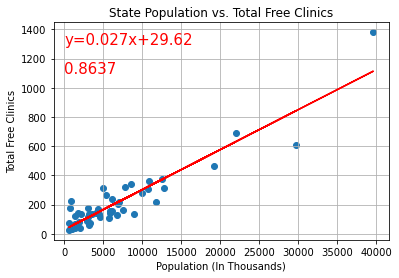

<Figure size 432x288 with 0 Axes>

In [73]:
# State Population vs. Total Free Clinics
x_values = states_rx_df['Population(in Thousands)']
y_values = states_rx_df['Total Free Clinics']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y='+ str(round(slope, 3)) + "x+" + str(round(intercept, 2))

plt.scatter(x_values, y_values, marker='o')
plt.title("State Population vs. Total Free Clinics")
plt.ylabel('Total Free Clinics')
plt.xlabel('Population (In Thousands)')
plt.plot(x_values, regress_values, color='red')
plt.annotate(line_eq,(0,1300),fontsize=15,color="red")
plt.annotate(round(rvalue**2, 4), (0,1100), fontsize=15, color='red')
plt.grid(True)

print(f'The r-value is: {rvalue**2}')

plt.show()
plt.savefig('PopVsPharma.png')

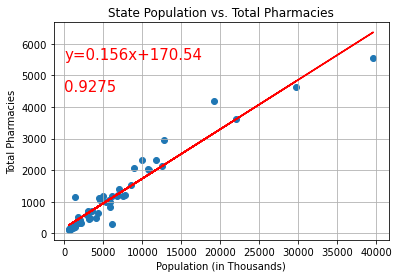

In [75]:
x_values = states_rx_df['Population(in Thousands)']
y_values = states_rx_df['Total Pharmacies']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y='+ str(round(slope, 3)) + "x+" + str(round(intercept, 2))

plt.scatter(x_values, y_values, marker='o')
plt.title('State Population vs. Total Pharmacies')
plt.ylabel('Total Pharmacies')
plt.xlabel('Population (in Thousands)')
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq,(0, 5500),fontsize=15,color="red")
plt.annotate(round(rvalue**2, 4), (0,4500), fontsize=15, color='red')
plt.grid(True)

plt.show()
# plt.savefig('PopVsFreeClinic')

The r-value is: 0.07082647771151734


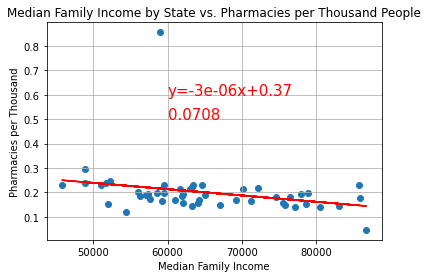

<Figure size 432x288 with 0 Axes>

In [77]:
# Median Family Income vs. Pharmacies Per Capita plot
x_values = states_rx_df['Median Family Income']
y_values = states_rx_df['Pharmas Per Thousand']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y='+ str(round(slope, 6)) + "x+" + str(round(intercept, 2))

plt.scatter(x_values, y_values, marker='o')
plt.title("Median Family Income by State vs. Pharmacies per Thousand People")
plt.ylabel('Pharmacies per Thousand')
plt.xlabel('Median Family Income')
plt.plot(x_values, regress_values, color='red')
plt.annotate(line_eq,(60000,.6),fontsize=15,color="red")
plt.annotate(round(rvalue**2, 4), (60000,.5), fontsize=15, color='red')
plt.grid(True)

print(f'The r-value is: {rvalue**2}')

plt.show()
plt.savefig('PharmaVsMFI.png')

The r-value is: 0.006692007952455543


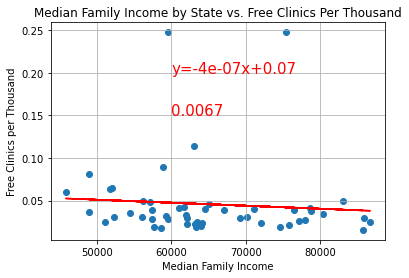

In [78]:
# Median Family Income vs. Number of Free Clinics per Capita
x_values = states_rx_df['Median Family Income']
y_values = states_rx_df['Free Clinics Per Thousand']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y='+ str(round(slope, 7)) + "x+" + str(round(intercept, 2))

plt.scatter(x_values, y_values, marker='o')
plt.title("Median Family Income by State vs. Free Clinics Per Thousand")
plt.ylabel('Free Clinics per Thousand')
plt.xlabel('Median Family Income')
plt.plot(x_values, regress_values, color='red')
plt.annotate(line_eq,(60000,.20),fontsize=15,color="red")
plt.annotate(round(rvalue**2, 4), (60000,.15), fontsize=15, color='red')
plt.grid(True)

print(f'The r-value is: {rvalue**2}')
plt.savefig('FreeClinicVsMFI.png')

The r-value is: 0.017202908675999634


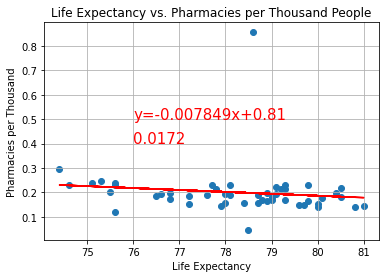

<Figure size 432x288 with 0 Axes>

In [79]:
# Life Expectancy vs. Pharmacies Per Capita plot
x_values = states_rx_df['Life Expectancy']
y_values = states_rx_df['Pharmas Per Thousand']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y='+ str(round(slope, 6)) + "x+" + str(round(intercept, 2))

plt.scatter(x_values, y_values, marker='o')
plt.title("Life Expectancy vs. Pharmacies per Thousand People")
plt.ylabel('Pharmacies per Thousand')
plt.xlabel('Life Expectancy')
plt.plot(x_values, regress_values, color='red')
plt.annotate(line_eq,(76,.5),fontsize=15,color="red")
plt.annotate(round(rvalue**2, 4), (76,.4), fontsize=15, color='red')
plt.grid(True)

print(f'The r-value is: {rvalue**2}')

plt.show()
plt.savefig('PharmaVsLE.png')

The r-value is: 0.0024842392970497265


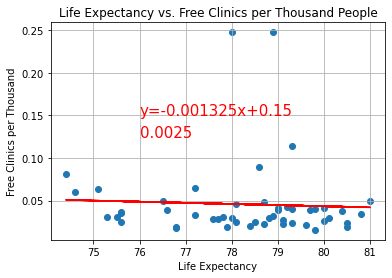

<Figure size 432x288 with 0 Axes>

In [80]:
# Life Expectancy vs. Free Clinics Per Capita plot
x_values = states_rx_df['Life Expectancy']
y_values = states_rx_df['Free Clinics Per Thousand']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y='+ str(round(slope, 6)) + "x+" + str(round(intercept, 2))

plt.scatter(x_values, y_values, marker='o')
plt.title("Life Expectancy vs. Free Clinics per Thousand People")
plt.ylabel('Free Clinics per Thousand')
plt.xlabel('Life Expectancy')
plt.plot(x_values, regress_values, color='red')
plt.annotate(line_eq,(76,.15),fontsize=15,color="red")
plt.annotate(round(rvalue**2, 4), (76,.125), fontsize=15, color='red')
plt.grid(True)

print(f'The r-value is: {rvalue**2}')

plt.show()
plt.savefig('FreeClinicVsLE.png')

In [75]:
states_rx_df.head(50)

,State,Total Pharmacies,Median Family Income,Population(in Thousands),Total Free Clinics,Pharmas Per Thousand,Free Clinics Per Thousand
0,AL,1186,51734,4934,314,0.240373,0.063640
1,AK,115,75463,724,179,0.158840,0.247238
2,AZ,1191,62055,7520,166,0.158378,0.022074
3,AR,720,48952,3034,113,0.237310,0.037245
4,CA,5559,80440,39613,1380,0.140333,0.034837
5,CO,833,77127,5894,155,0.141330,0.026298
6,CT,700,78833,3553,136,0.197017,0.038278
7,DE,211,70176,990,30,0.213131,0.030303
8,FL,3628,59227,21945,693,0.165322,0.031579
9,GA,2000,61980,10830,365,0.184672,0.033703


In [81]:
states_rx_df.to_csv('Pharmacy_Data.csv')